In [13]:
#comparing epsilons
#ref: https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
#     https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python

In [14]:
from __future__ import print_function, division # Note: update your version of future
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [15]:
class Bandit:
 def __init__(self, m):
    self.m = m
    self.mean = 0 
    self.N = 1 

 def pull(self):
    return np.random.randn() + self.m # randn : return a sample (or samples) from “standard normal” distribution.

 def update(self, x):
        self.N = self.N + 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [16]:
def ucb(mean, n, nj):
    if nj == 0:
        return float('inf')
    return mean + np.sqrt(2*np.log(n) / nj)

In [17]:
def run_experiment_ucb1(m1, m2, m3, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N) # empty: return a new array of given shape and type, without initializing entries.
  
  for i in range(N):
    # confedence bound
    j = np.argmax([ucb(b.mean, i+1, b.N) for b in bandits]) 
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  for b in bandits:
    print("bandit nj:", b.N)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

In [18]:
def run_experiment_eps(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N) # empty: return a new array of given shape and type, without initializing entries.
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3) #choices: Generates a random sample from a given 1-D array
    else:
      j = np.argmax([b.mean for b in bandits]) #argmax: Returns the indices of the maximum values along an axis.
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

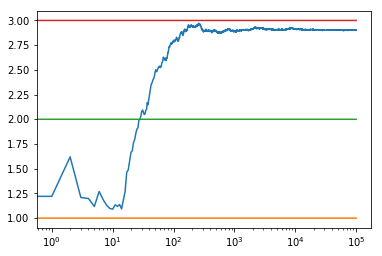

1.0129175502954226
1.9796158428726929
3.000640186012339
bandit nj: 2
bandit nj: 14
bandit nj: 99987


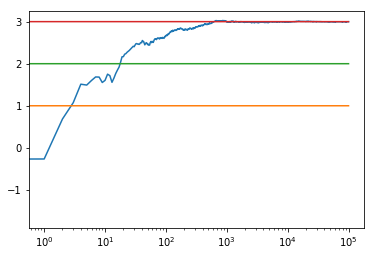

-0.8357215943313063
1.6764649774725517
2.998623064820316


In [19]:
if __name__ == '__main__':
  c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
  ucb = run_experiment_ucb1(1.0, 2.0, 3.0, 100000)

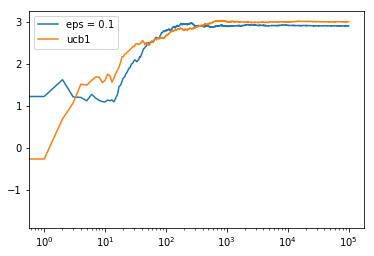

In [20]:
  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(ucb, label='ucb1')
  plt.legend()
  plt.xscale('log')
  plt.show()

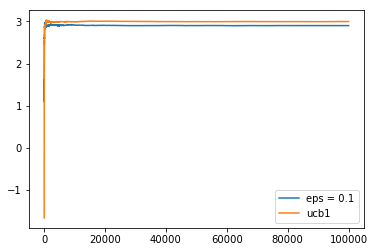

In [21]:
  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(ucb, label='ucb1')
  plt.legend()
  plt.show()